# **Peer-to-Peer network analysis**
# **By Qassem Al-Hanbali**

# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

# Dataset

*  The dataset is about peer-to-peer file sharing network.
*  In this network topology, we can consider the **Hosts** as a **Nodes** and the **connections between the hosts** as **Edges**.
* Source of the dataset: https://snap.stanford.edu/data/p2p-Gnutella08.html  




In [ ]:
df = pd.read_table("/content/drive/MyDrive/Datasets/p2p-Gnutella08.txt")
df

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
20772,6296,5076
20773,6296,5236
20774,6296,6297
20775,6296,6298


from matplotlib import pyplot as plt
df['FromNodeId'].plot(kind='hist', bins=20, title='FromNodeId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['ToNodeId'].plot(kind='hist', bins=20, title='ToNodeId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='FromNodeId', y='ToNodeId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FromNodeId']
  ys = series['ToNodeId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('FromNodeId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FromNodeId')
_ = plt.ylabel('ToNodeId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['FromNodeId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'FromNodeId'}, axis=1)
              .sort_values('FromNodeId', ascending=True))
  xs = counted['FromNodeId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('FromNodeId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FromNodeId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['FromNodeId'].plot(kind='line', figsize=(8, 4), title='FromNodeId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['ToNodeId'].plot(kind='line', figsize=(8, 4), title='ToNodeId')
plt.gca().spines[['top', 'right']].set_visible(False)

# Creating a Network Graphs

In [ ]:
g = nx.from_pandas_edgelist(df,source='FromNodeId', target='ToNodeId')

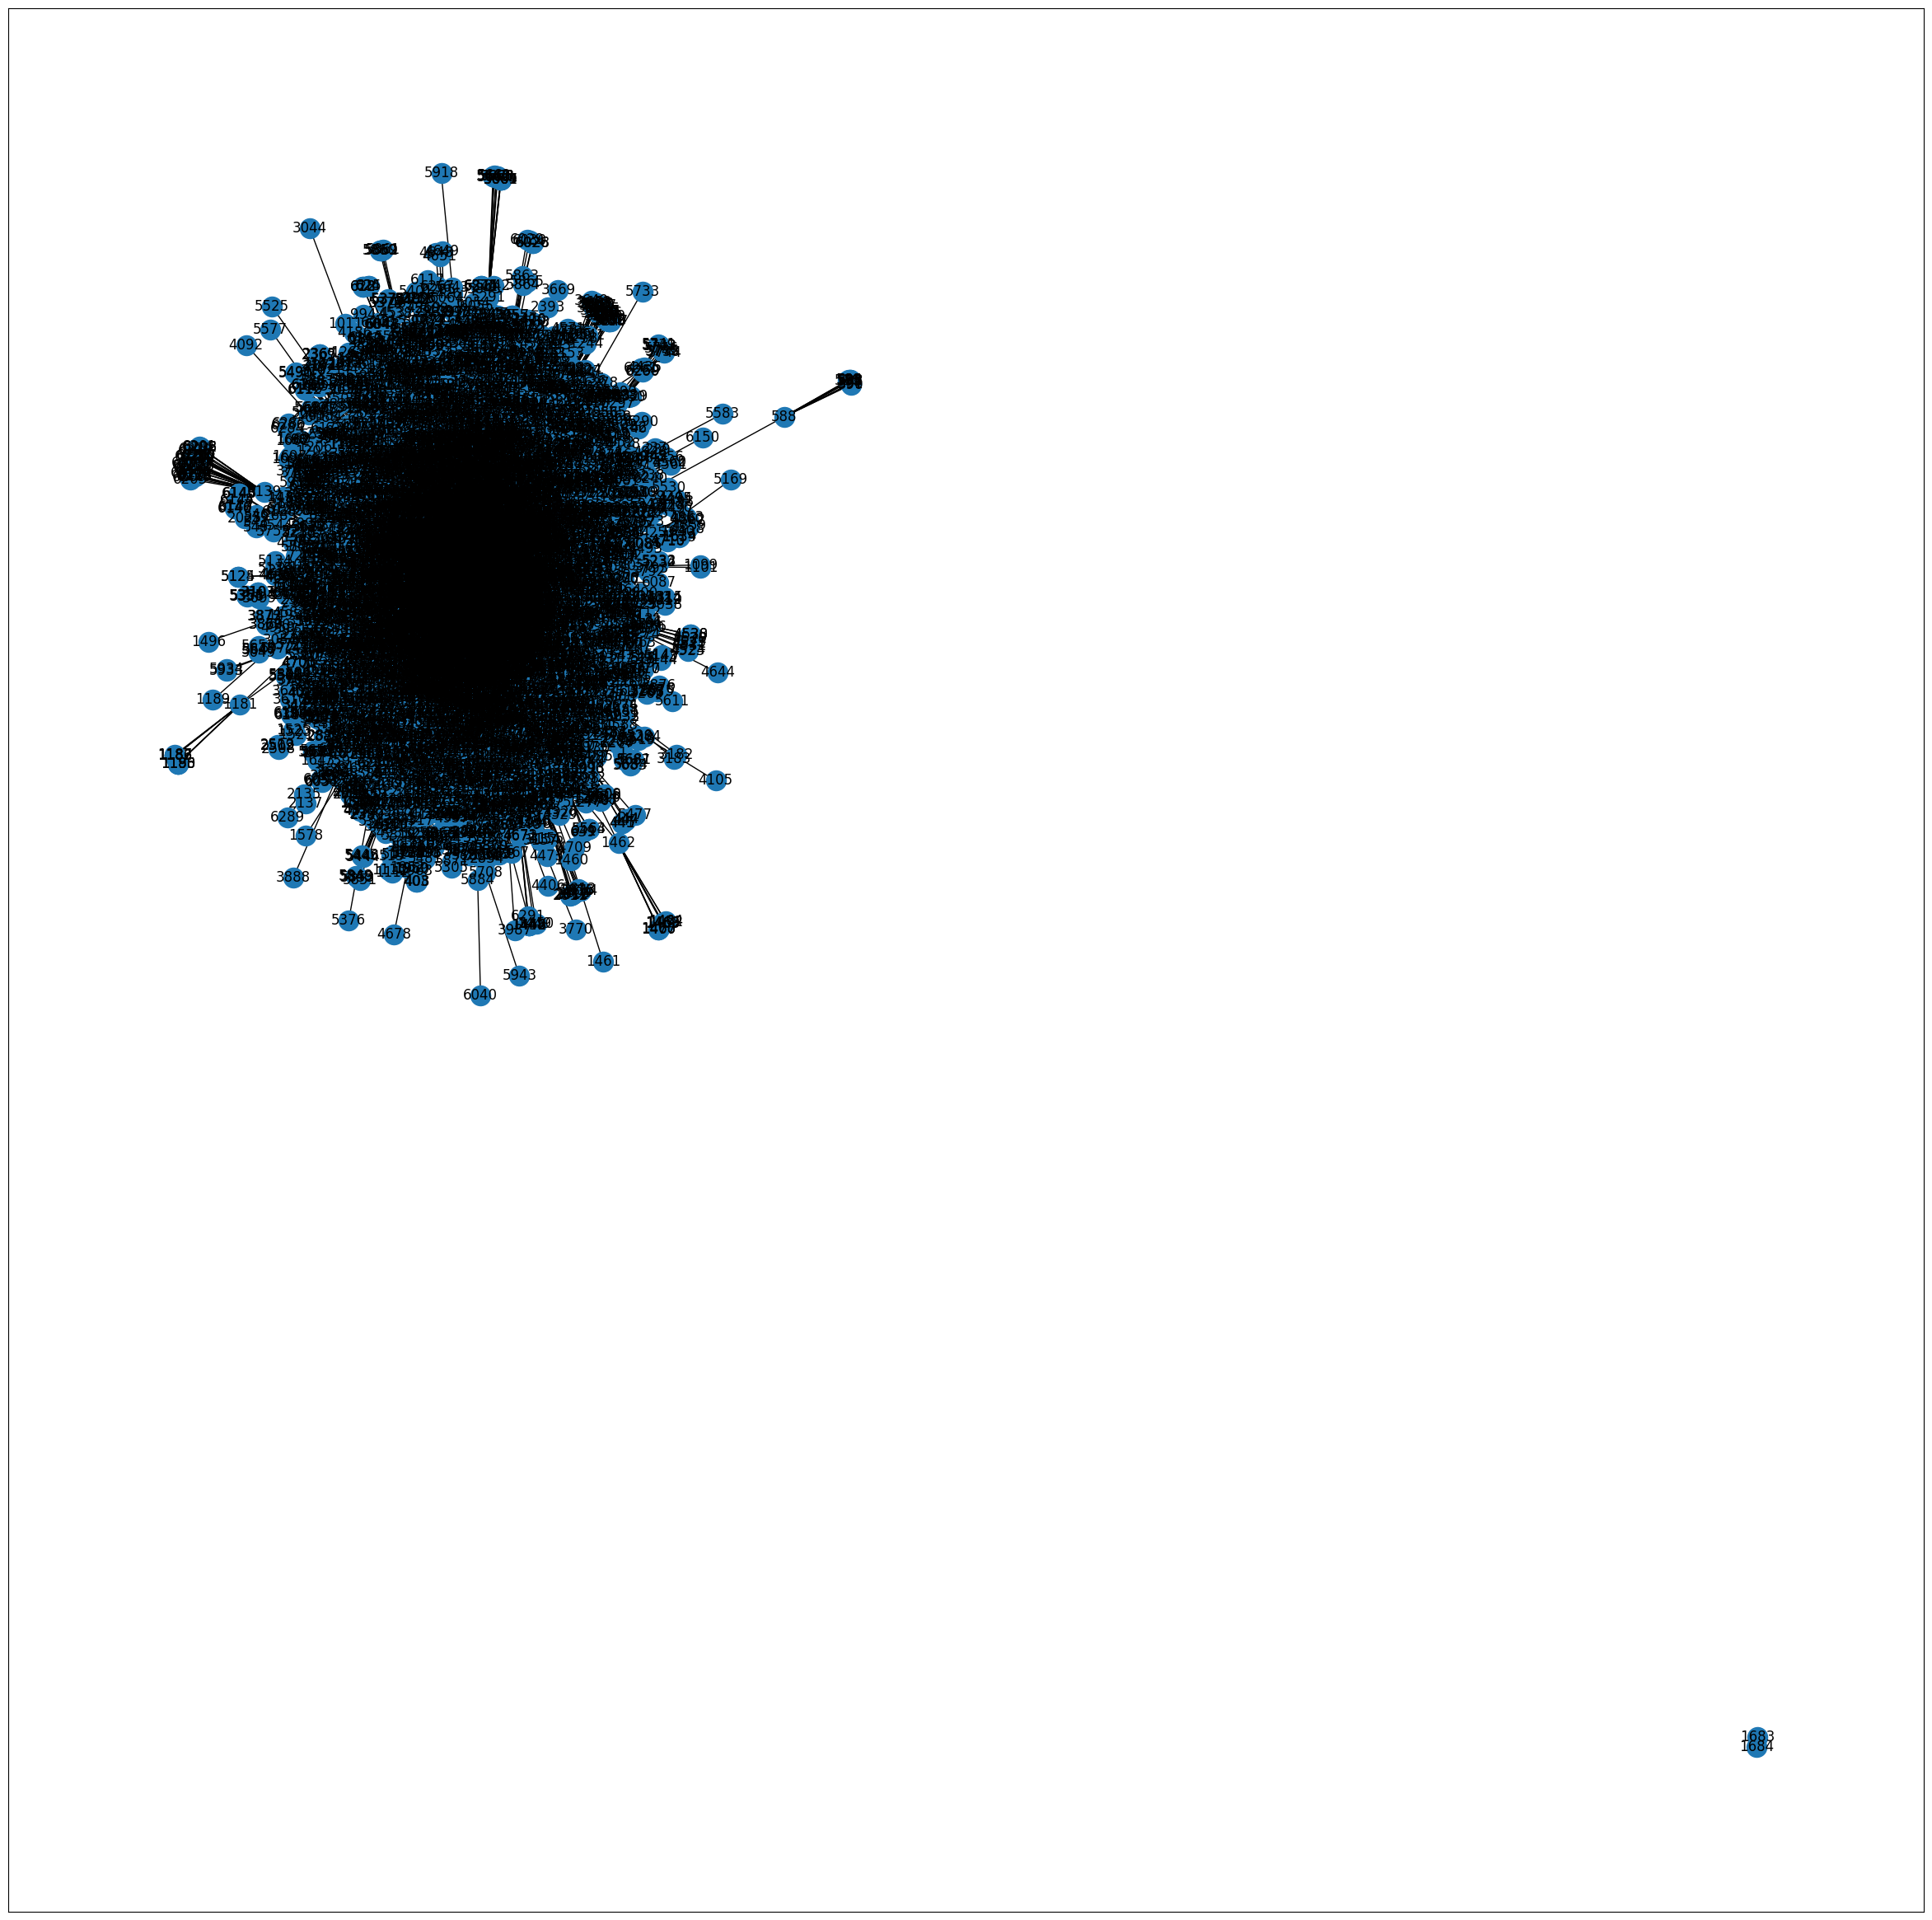

In [ ]:
plt.figure(figsize=(30,30))
nx.draw_networkx(g)
plt.show()

In [ ]:
print("Number of nodes:\t", g.number_of_nodes())
print("Number of edges:\t", g.number_of_edges())

Number of nodes:	 6301
Number of edges:	 20777


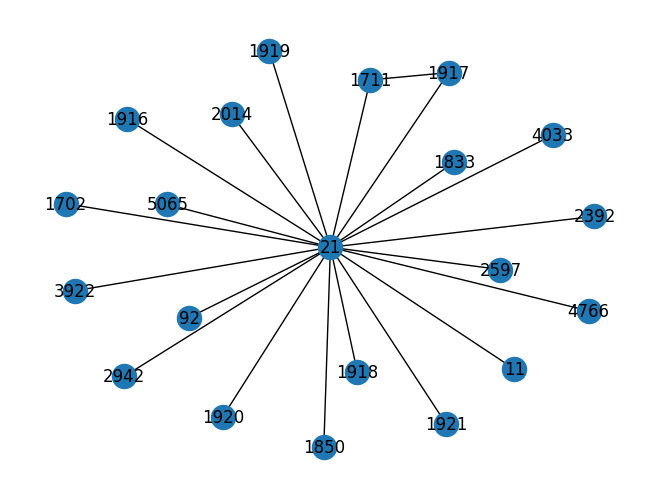

In [ ]:
ego = nx.ego_graph(g, 21)
nx.draw(ego, with_labels=True)

In [ ]:
g2 = nx.from_pandas_edgelist(df[50:100],source='FromNodeId',target='ToNodeId')

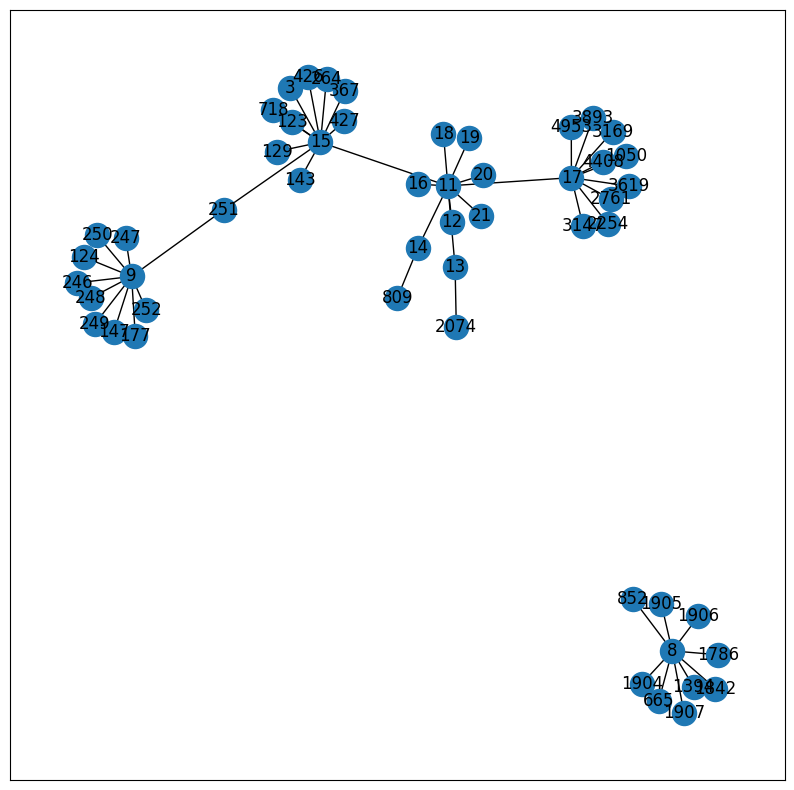

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(g2)
plt.show()

# Betweenness Centrality

In [ ]:
bc = nx.betweenness_centrality(g)

In [ ]:
bc

{0: 0.0007079026475741214,
 1: 0.0,
 2: 2.9578917792846456e-05,
 3: 0.009872614394265547,
 4: 0.00597436215380459,
 5: 0.005613631460403851,
 6: 0.0,
 7: 0.0028883156807279213,
 8: 0.011224356137780923,
 9: 0.0036664347794276436,
 10: 2.2562293169200154e-05,
 703: 0.0017797541879590033,
 826: 0.00019967225458704266,
 1097: 0.0006498619492834071,
 1287: 0.0028259559576827957,
 1591: 0.0012279901895495312,
 1895: 4.291649571179194e-05,
 1896: 0.0015740635401467785,
 1897: 0.0,
 1898: 9.596832920026741e-05,
 1899: 3.162647123449176e-05,
 144: 0.005206772570101154,
 258: 2.442300554295727e-05,
 491: 0.0014266419918243893,
 1021: 0.0013259824124280818,
 1418: 9.589420865565821e-06,
 1669: 0.0012292998530928686,
 1900: 0.0003624636931854012,
 1901: 0.0004537686267714708,
 1902: 0.0,
 1903: 0.0012847295235450765,
 121: 0.0017278479468394996,
 127: 0.009015420215358316,
 128: 0.0014855531567230182,
 179: 0.0064111714493601665,
 247: 0.006030759064166532,
 249: 0.006907090725342636,
 264: 0.008

In [ ]:
sorted_bc = sorted(bc.items(), key=lambda x: x[1], reverse=True)
top_bc = sorted_bc[:15]
for node, centrality in top_bc:
    print(f"Node {node}: Betweenness Centrality {centrality}")

Node 5831: Betweenness Centrality 0.01538117372359118
Node 1317: Betweenness Centrality 0.014081409493490304
Node 424: Betweenness Centrality 0.013917183001735329
Node 5202: Betweenness Centrality 0.011575394942432392
Node 8: Betweenness Centrality 0.011224356137780923
Node 1675: Betweenness Centrality 0.011224207068785205
Node 6139: Betweenness Centrality 0.010914924631998191
Node 1890: Betweenness Centrality 0.010808555042570146
Node 125: Betweenness Centrality 0.010797380403418442
Node 3: Betweenness Centrality 0.009872614394265547
Node 251: Betweenness Centrality 0.00986535075074179
Node 248: Betweenness Centrality 0.00909656393798989
Node 123: Betweenness Centrality 0.009022312057869835
Node 127: Betweenness Centrality 0.009015420215358316
Node 264: Betweenness Centrality 0.0087896038644233


In [ ]:
bc_for_sample = nx.betweenness_centrality(g2)
sorted_bc2 = sorted(bc_for_sample.items(), key=lambda x: x[1], reverse=True)
top_bc2 = sorted_bc2[:15]
for node, centrality in top_bc2:
    print(f"Node {node}: Betweenness Centrality {centrality}")

Node 11: Betweenness Centrality 0.44156862745098036
Node 15: Betweenness Centrality 0.43529411764705883
Node 9: Betweenness Centrality 0.2541176470588235
Node 17: Betweenness Centrality 0.2541176470588235
Node 251: Betweenness Centrality 0.24313725490196078
Node 13: Betweenness Centrality 0.03137254901960784
Node 14: Betweenness Centrality 0.03137254901960784
Node 8: Betweenness Centrality 0.028235294117647056
Node 665: Betweenness Centrality 0.0
Node 852: Betweenness Centrality 0.0
Node 1394: Betweenness Centrality 0.0
Node 1786: Betweenness Centrality 0.0
Node 1842: Betweenness Centrality 0.0
Node 1904: Betweenness Centrality 0.0
Node 1905: Betweenness Centrality 0.0


# Degree Distribution

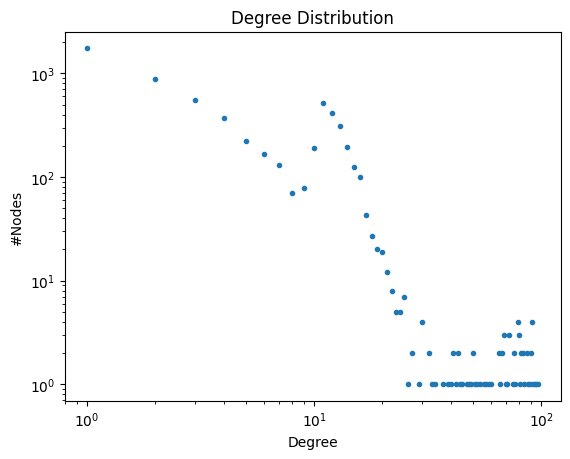

In [ ]:
hist = nx.degree_histogram(g)

plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

# Degree Centrality

In [ ]:
dc = nx.degree_centrality(g)
dc

{0: 0.0015873015873015873,
 1: 0.00015873015873015873,
 2: 0.0009523809523809524,
 3: 0.01380952380952381,
 4: 0.010952380952380953,
 5: 0.013174603174603174,
 6: 0.00015873015873015873,
 7: 0.009523809523809525,
 8: 0.013333333333333332,
 9: 0.009365079365079364,
 10: 0.0011111111111111111,
 703: 0.002380952380952381,
 826: 0.0006349206349206349,
 1097: 0.0011111111111111111,
 1287: 0.002698412698412698,
 1591: 0.0019047619047619048,
 1895: 0.00031746031746031746,
 1896: 0.002380952380952381,
 1897: 0.00015873015873015873,
 1898: 0.0004761904761904762,
 1899: 0.00031746031746031746,
 144: 0.01253968253968254,
 258: 0.00031746031746031746,
 491: 0.001746031746031746,
 1021: 0.001746031746031746,
 1418: 0.00031746031746031746,
 1669: 0.0020634920634920633,
 1900: 0.0011111111111111111,
 1901: 0.0009523809523809524,
 1902: 0.00015873015873015873,
 1903: 0.001746031746031746,
 121: 0.008571428571428572,
 127: 0.01507936507936508,
 128: 0.007936507936507936,
 179: 0.012698412698412698,
 24

# Closeness Centrality

In [ ]:
cc = nx.closeness_centrality(g)
cc

{0: 0.2551260489067443,
 1: 0.20326071460599307,
 2: 0.22994049285711388,
 3: 0.2902854274019381,
 4: 0.2839105625415149,
 5: 0.2907143480131429,
 6: 0.20326071460599307,
 7: 0.28350146951191624,
 8: 0.29117146718404635,
 9: 0.283297364782246,
 10: 0.23496046555159855,
 703: 0.2522436151811152,
 826: 0.23405206821266303,
 1097: 0.24139255559085326,
 1287: 0.26004711225974286,
 1591: 0.2535642623810163,
 1895: 0.22669501439961962,
 1896: 0.2533601865159209,
 1897: 0.22496965035805885,
 1898: 0.22945444932106254,
 1899: 0.22821518902858615,
 144: 0.29067408286798874,
 258: 0.22803334425645183,
 491: 0.24689230363203934,
 1021: 0.244571364445505,
 1418: 0.22576020635831306,
 1669: 0.24787404074490688,
 1900: 0.23611478098333527,
 1901: 0.239865918733642,
 1902: 0.22112178677767133,
 1903: 0.24688262234023353,
 121: 0.2745508736665199,
 127: 0.29573961364651397,
 128: 0.27552407487289987,
 179: 0.29164353506210094,
 247: 0.28023325922110803,
 249: 0.29419188986125117,
 264: 0.2946876028514

In [ ]:
cc_for_sample = nx.closeness_centrality(g2)
sorted_cc2 = sorted(cc_for_sample.items(), key=lambda x: x[1], reverse=True)
top_cc2 = sorted_cc2[:15]
for node, centrality in top_cc2:
    print(f"Node {node}: Betweenness Centrality {centrality}")

Node 11: Betweenness Centrality 0.3622064210299505
Node 15: Betweenness Centrality 0.3622064210299505
Node 251: Betweenness Centrality 0.2969440028263558
Node 17: Betweenness Centrality 0.2916883567586327
Node 13: Betweenness Centrality 0.25550995592035264
Node 14: Betweenness Centrality 0.25550995592035264
Node 12: Betweenness Centrality 0.25160904056279004
Node 16: Betweenness Centrality 0.25160904056279004
Node 18: Betweenness Centrality 0.25160904056279004
Node 19: Betweenness Centrality 0.25160904056279004
Node 20: Betweenness Centrality 0.25160904056279004
Node 21: Betweenness Centrality 0.25160904056279004
Node 3: Betweenness Centrality 0.25160904056279004
Node 123: Betweenness Centrality 0.25160904056279004
Node 129: Betweenness Centrality 0.25160904056279004


# Clustering Coefficients

In [ ]:
clustering_coefficients = nx.clustering(g)
clustering_coefficients

{0: 0,
 1: 0,
 2: 0,
 3: 0.008286554397219995,
 4: 0.01875532821824382,
 5: 0.0484866294446077,
 6: 0,
 7: 0.05254237288135593,
 8: 0.00717154331612163,
 9: 0.049094097019286964,
 10: 0,
 703: 0.0380952380952381,
 826: 0,
 1097: 0,
 1287: 0,
 1591: 0,
 1895: 0,
 1896: 0.01904761904761905,
 1897: 0,
 1898: 0,
 1899: 0,
 144: 0.03343070431678027,
 258: 0,
 491: 0,
 1021: 0,
 1418: 0,
 1669: 0,
 1900: 0,
 1901: 0,
 1902: 0,
 1903: 0,
 121: 0.017470300489168415,
 127: 0.027547592385218363,
 128: 0.014693877551020407,
 179: 0.029746835443037974,
 247: 0.013664596273291925,
 249: 0.03545568039950062,
 264: 0.021245421245421246,
 353: 0.04335443037974684,
 424: 0.006450071667462972,
 426: 0.04093567251461988,
 145: 0.04269662921348315,
 176: 0.02882882882882883,
 177: 0.0451152223304122,
 753: 0.07509881422924901,
 754: 0.027149321266968326,
 762: 0.03908045977011494,
 2064: 0.1,
 3002: 0.1,
 520: 0,
 665: 0.03676470588235294,
 852: 0.007905138339920948,
 1394: 0.07575757575757576,
 1786: 0.0

In [ ]:
# Sort nodes based on clustering coefficient in descending order
sorted_clustering_coefficients= sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)


top_sorted_clustering_coefficients = sorted_clustering_coefficients[:25]

# Display the top ten nodes
for node, clustering_coefficient in top_sorted_clustering_coefficients:
    print(f"Node {node}: Clustering Coefficient {clustering_coefficient}")

Node 506: Clustering Coefficient 1.0
Node 702: Clustering Coefficient 1.0
Node 3589: Clustering Coefficient 1.0
Node 4223: Clustering Coefficient 1.0
Node 4278: Clustering Coefficient 1.0
Node 4321: Clustering Coefficient 1.0
Node 5060: Clustering Coefficient 1.0
Node 6287: Clustering Coefficient 1.0
Node 4022: Clustering Coefficient 0.6666666666666666
Node 2893: Clustering Coefficient 0.3333333333333333
Node 137: Clustering Coefficient 0.3333333333333333
Node 2111: Clustering Coefficient 0.3333333333333333
Node 1334: Clustering Coefficient 0.3333333333333333
Node 2395: Clustering Coefficient 0.3333333333333333
Node 464: Clustering Coefficient 0.3333333333333333
Node 536: Clustering Coefficient 0.3333333333333333
Node 800: Clustering Coefficient 0.3333333333333333
Node 1351: Clustering Coefficient 0.3333333333333333
Node 2762: Clustering Coefficient 0.3333333333333333
Node 2806: Clustering Coefficient 0.3333333333333333
Node 991: Clustering Coefficient 0.3333333333333333
Node 3146: Clu

# Global Clustering

In [ ]:
print(f"Global clustering: {nx.average_clustering(g)}")

Global clustering: 0.010867921935819964
